<img src="https://www.galileo.edu/wp-content/uploads/2010/12/logo-ug.png" width="200px">
<h3>Instituto de Investigación de operaciones</h3>
<h3>Posgrado en Análisis y Predicción de Datos</h3>
<h3><b>Ciencia de Datos con Python</b></h3>
<h4><b>Profesor: Ing. Preng Biba</b></h4>

<h4><b>Desarrollado por: Javier Navarro - 20015565</b></h4>


<h1>Proyecto</h1>

## 1. Crear un entorno de anaconda con los paquetes que considere necesarios.
Tras haber creado el entorno en anaconda instalando los modulos necesarios, procedemos a importar las librerias
autorizadas para el proyecto

In [76]:
import seaborn as sb
import sklearn as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento (80%) y validación y pruebas (20 %).


In [77]:
# Cargamos el arreglo que se encuentra en formato binario de numpy a un arreglo ordinario de numpy
data = np.load("proyecto_data/proyecto_training_data.npy")
# Luego vamos a definir cual es el equivalente en cantidad de filas al 80% y 20% de datos respectivamente
data_count = len(data)
train_data_count = int(data_count * 0.8)
test_data_count = int(data_count * 0.2)
train_data = data[:train_data_count]
test_data = data[:test_data_count]

## 3. Análisis exploratorio de datos: para cada variable en el dataset calcular:
- media
- valor máximo
- valor mínimo
- rango
- desviación estándar

In [78]:
def pretty(d, indent=0):
    """
    Para imprimir el diccionario bonito.
    :param d: diccionario
    :param indent: indentación inicial
    :return: cadena de texto con diccionario enbellecido
    """
    result = ''
    for key, value in d.items():
        result += '\t' * indent + str(key)
        if isinstance(value, dict):
            result += '\n' + pretty(value, indent + 1) + '\n'
        else:
            result += '\t' * (indent + 1) + str(value) + '\n'
    return result

def exploratory_analysis(nombre):
    """
    Para realizar analisis exploratorio a una variable
    :param nombre: nombre de la variable
    :return: diccionario con los campos solicitados
    """
    return {
        'Media': np.mean(df[nombre]),
        'Max': np.max(df[nombre]),
        'Min': np.min(df[nombre]),
        'Rango': np.ptp(df[nombre], axis = 0),
        'DesEst': np.std(df[nombre])
    }


columns = ['SalePrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
df = pd.DataFrame(data = data, columns = columns)
df= df.dropna()
print('Realizando análisis exploratorio para las variables')
for c in columns:
    print('-------- ' + c + ' --------')
    print(pretty(exploratory_analysis(c)))

Realizando análisis exploratorio para las variables
-------- SalePrice --------
Media	180770.48043297252
Max	755000.0
Min	34900.0
Rango	720100.0
DesEst	83354.79593318116

-------- OverallQual --------
Media	6.122398001665279
Max	10.0
Min	1.0
Rango	9.0
DesEst	1.4186246267434528

-------- FstFlrSF --------
Media	1158.4379683597003
Max	4692.0
Min	334.0
Rango	4358.0
DesEst	386.0963947024117

-------- TotRmsAbvGrd --------
Media	6.535387177352207
Max	14.0
Min	2.0
Rango	12.0
DesEst	1.6289292583457589

-------- YearBuilt --------
Media	1970.5803497085763
Max	2010.0
Min	1872.0
Rango	138.0
DesEst	31.73711355123208

-------- LotFrontage --------
Media	70.04995836802665
Max	313.0
Min	21.0
Rango	292.0
DesEst	24.27463944767604



## 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

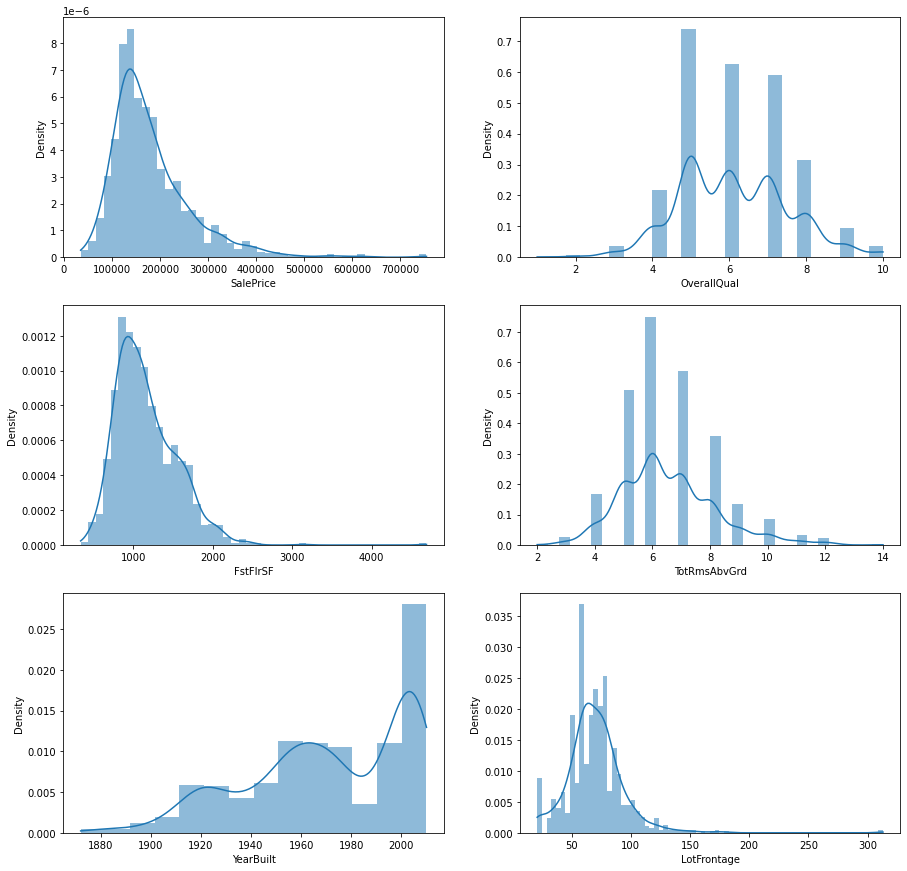

In [79]:
#Vamos a construir un plot compuesto por seis subplots, distribuidos en tres filas y dos columnas
m = 3
n = 2
axes = plt.subplots(m, n, figsize = (15,15))[1]
def add_hist(name, i, j):
    sb.histplot(df[name], ax = axes[i,j], kde = True, stat = "density", linewidth = 0)
c = 0
for i in range(m):
    for j in range(n):
        add_hist(columns[c], i,j)
        c += 1

## 5. Para cada variable independiente x:
- Calcular el coeficiente de correlación entre x & y.
- Graficar x vs y (scatterplot) usando matplotlib.
- Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
- Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial
  predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dep

[[1.         0.80228746]
 [0.80228746 1.        ]]
[[1.         0.62015939]
 [0.62015939 1.        ]]
[[1.        0.5372153]
 [0.5372153 1.       ]]
[[1.         0.53891324]
 [0.53891324 1.        ]]
[[1.        0.3517991]
 [0.3517991 1.       ]]


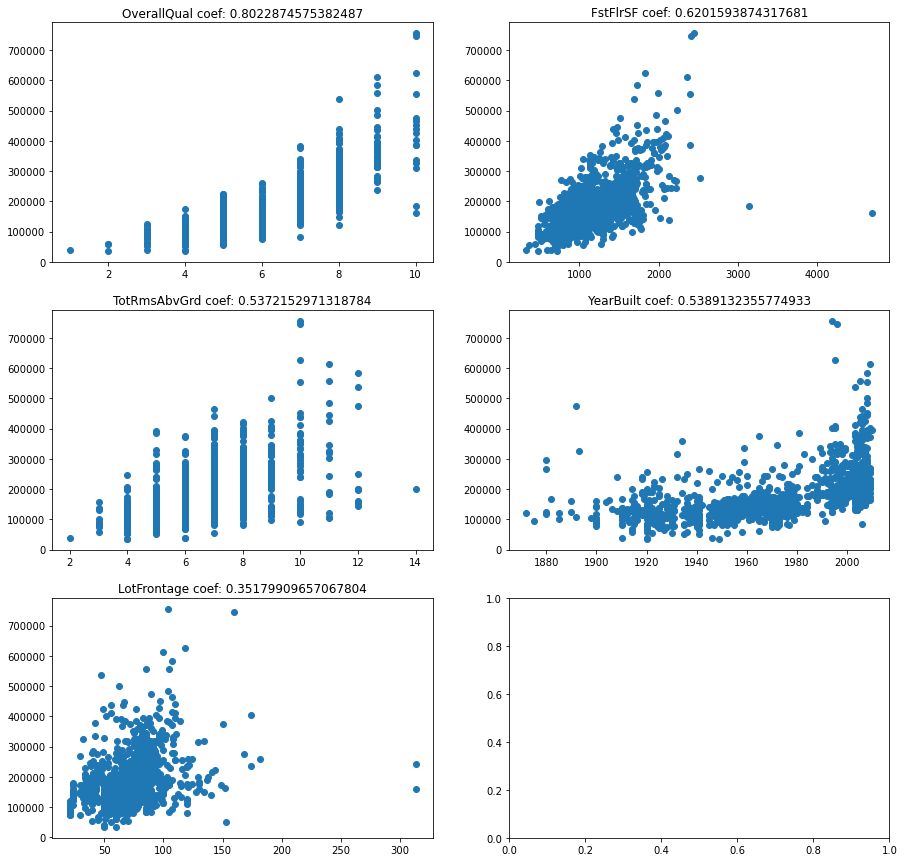

In [80]:
m = 3
n = 2
axes = plt.subplots(m, n, figsize = (15,15))[1]
def add_scatter(c, i, j):
    x = df[columns[c]]
    y = df[columns[0]]
    axes[i, j].scatter(x,y)
    print(np.corrcoef(x,y))
    axes[i, j].set_title(columns[c] + " coef: " + str(np.corrcoef(x,y)[0,1]))
c = 1
for i in range(m):
    for j in range(n):
        if c<len(columns):
            add_scatter(c, i,j)
        c += 1